In [1]:
from __future__ import division, print_function, generators

import tensorflow as tf
import keras

import numpy as np
import keras.datasets.mnist as mnist
import keras.datasets.cifar10 as cifar10
import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


## Schedule

- What is MNIST? What is CIFAR?

- Loading images and converting them to numpy

- What is Keras? Creating a basic model, Callbacks, saving/loading a model, changing optimizer, loss  (30 minutes)

- Mini-Project: Train a feed forward NN on MNIST/CIFAR10 with Keras

- Preprocessing images: Scaling

- Mini-Project: Train a feed forward NN on MNIST/CIFAR10 with Keras with scaling

- Preprocessing images: Data augmentation and generators with Keras

- Mini-Project: Train a feed forward NN on MNIST/CIFAR10 using data augmentation with Keras

- Break

- Convolutional NN, Pooling 

- How to build a CNN in Keras 

- Mini-Project: Train CNN on MNIST/CIFAR10

## What is CIFAR10?

More information at
https://www.cs.toronto.edu/~kriz/cifar.html

50000 Number of train samples
10000 Number of test samples
x_train shape: (50000, 32, 32, 3)


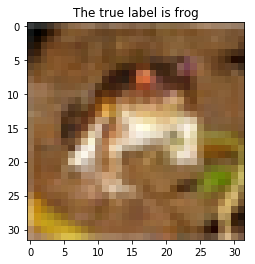

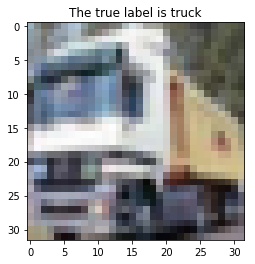

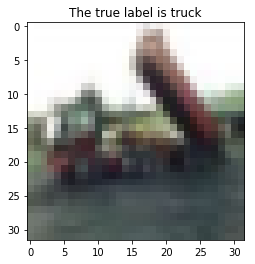

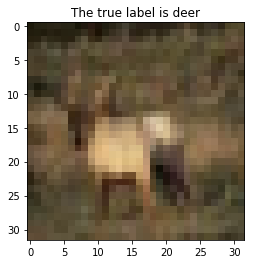

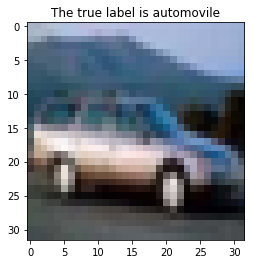

In [8]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# This is needed to know what each class means
label_id_to_class_name = {0:'airplane', 1:'automovile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 
                          6:'frog', 7:'horse', 8:'ship', 9:'truck'}

print(x_train.shape[0], 'Number of train samples')
print(x_test.shape[0], 'Number of test samples')
print('x_train shape:', x_train.shape)

# plot images
for image_id in range(0, 5):
    plt.imshow(x_train[image_id])
    plt.title("The true label is %s" % label_id_to_class_name[int(y_train[image_id])])
    plt.show()
    
# loading and reshaping the data
    
# This makes sure the image has the correct order in the axis for Tensorflow, it would be different for Theano backend
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# Convert values to floats, originally they are integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Convert values of labels from 0 to 9 to categorical (one_hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## What is MNIST?

More information at http://yann.lecun.com/exdb/mnist/

60000 Number of train samples
10000 Number of test samples
x_train shape: (60000, 28, 28)


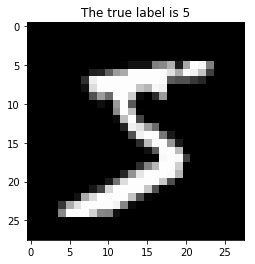

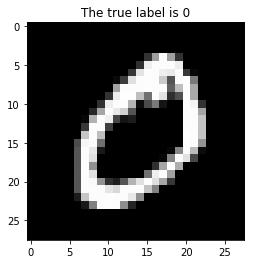

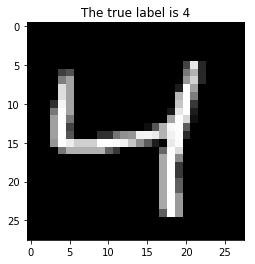

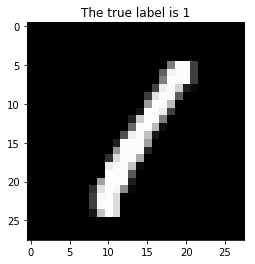

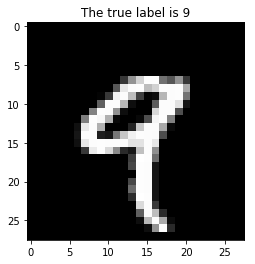

In [9]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape[0], 'Number of train samples')
print(x_test.shape[0], 'Number of test samples')
print('x_train shape:', x_train.shape)

# plot images as gray scale
for image_id in range(0, 5):
    plt.imshow(x_train[image_id], cmap=plt.get_cmap('gray'))
    plt.title("The true label is %s" % str(y_train[image_id]))
    plt.show()
    
# Loading an reshaping the data
    
# This makes sure the image has the correct order in the axis for Tensorflow, it would be different for Theano backend
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert values to floats, originally they are integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Convert values of labels from 0 to 9 to categorical (one_hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Why use Keras?

"Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).

- Supports both convolutional networks and recurrent networks, as well as combinations of the two.

- Runs seamlessly on CPU and GPU." (Chollet, F.)

More information at https://keras.io Descriptions about the functions, documentation and some code examples are also taken or inspired from this website and the Keras Project.

In summary, it makes your life way easier if you don't require to go to the level of granularity of Tensorflow

## How does it work?



To train a model we have 3 main steps:

   - Define your architecture (number of layers, type of layers, activations, etc)
    
   - Compile your model (Define optimizer, callbacks, etc)
    
   - Train your model (Fit model to your data)

### Define your architecture

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation

model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Images are a 3D matrix, we have to flatten them to be 1D
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5)) # drop a unit with  50% probability.
model.add(Dense(150, kernel_initializer='orthogonal'))
model.add(Activation('sigmoid'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax')) # last layer, this has a softmax to do the classification

The sequential model is one layer after the other, no fancy connections. You can also use the Functional API if you want to have connections which skip layers and so on.

To add a layer all we have to do is call the add method and then add a layer object.

The first layer needs to have the input shape specified. After this the sizes are inferred automatically except for the output layer.

We need to use the flatten layer to flatten the input since it is an image, which in this case is a 3 dimensional matrix. It has height, width and depth. In the case of a grayscale image like the ones from MNIST it has 1 dimensional depth. If it is a color image it has 3 layers of depth (Red, Green, Blue).

A dense layer is a layer in which all units are connected to all units in the next layer. This is the most usual type of layer. You can specify things like the number of units and how the weights in the units are initialized (kernel_initializer). You can also specify an activation function, by default a linear function is used (No activation).

If you want to use dropout in your model you can just add it as an extra layer in between layers or activations. Same thing for batch normalization.

At the end we create a layer which will help us with the classification. For this we use a softmax layer in which the number of units will match the number of classes we have in our data.



#### Dense Layer

keras.layers.Dense(units, activation=None, use_bias=True, 
                   kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                   kernel_regularizer=None, bias_regularizer=None, 
                   activity_regularizer=None, 
                   kernel_constraint=None, bias_constraint=None)
                   
Arguments

- units: Positive integer, dimensionality of the output space.
- activation: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
- use_bias: Boolean, whether the layer uses a bias vector.
- kernel_initializer: Initializer for the kernel weights matrix.
- bias_initializer: Initializer for the bias vector.
- kernel_regularizer: Regularizer function applied to the kernel weights matrix. (L1, L2)
- bias_regularizer: Regularizer function applied to the bias vector.
- activity_regularizer: Regularizer function applied to the output of the layer (its "activation").
- kernel_constraint: Constraint function applied to the kernel weights matrix. (non-negative, etc)
- bias_constraint: Constraint function applied to the bias vector.

### Compile the model

Here we specify the loss, in our case categorical crossentropy. We can add an extra metric we want to measure, like accuracy

We also specify the optimizer. Some examples are Adam and SGD

In [11]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Compile function

Arguments

- optimizer: String (name of optimizer) or optimizer object. (SGD, RMSprop, Adam, Adagrad, etc)
- loss: String (name of objective function) or objective function. You can also have multiple loss functions
- metrics: List of metrics to be evaluated by the model during training and testing. 
- sample_weight_mode: If you need to do timestep-wise sample weighting (2D weights), set this to "temporal". None defaults to sample-wise weights (1D).
- weighted_metrics: List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.

### Callbacks

A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.

Some examples:

In [12]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
my_callbacks = [early_stopping]

### Train the model

In [13]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=100, verbose=1, callbacks=my_callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 74us/step - loss: 0.8929 - acc: 0.7452 - val_loss: 0.2953 - val_acc: 0.9116
Epoch 2/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.4160 - acc: 0.8746 - val_loss: 0.2511 - val_acc: 0.9233
Epoch 3/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.3550 - acc: 0.8928 - val_loss: 0.2081 - val_acc: 0.9388
Epoch 4/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.3214 - acc: 0.9015 - val_loss: 0.1973 - val_acc: 0.9422
Epoch 5/10
48000/48000 [==============================] - 3s 66us/step - loss: 0.3103 - acc: 0.9050 - val_loss: 0.1891 - val_acc: 0.9442
Epoch 6/10
48000/48000 [==============================] - 3s 62us/step - loss: 0.2886 - acc: 0.9122 - val_loss: 0.1795 - val_acc: 0.9473
Epoch 7/10
48000/48000 [==============================] - 3s 64us/step - loss: 0.2794 - acc: 0.9151 - val_loss: 0.1693 - val_acc

#### Fit function

Arguments

- x: Numpy array of training data. 
- y: Numpy array of target (label) data.
- batch_size: Integer or None. Number of samples per gradient update. If unspecified, it will default to 32.
- epochs: Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
- verbose: 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
- callbacks: List of keras.callbacks.Callback instances. List of callbacks to apply during training.
- validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data.
- validation_data: tuple (x_val, y_val) or tuple (x_val, y_val, val_sample_weights) on which to evaluate the loss and any model metrics at the end of each epoch.
- shuffle: Boolean (whether to shuffle the training data before each epoch)
- class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only).
- sample_weight: Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
- initial_epoch: Epoch at which to start training (useful for resuming a previous training run).
- steps_per_epoch: Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined.
- validation_steps: Only relevant if steps_per_epoch is specified. Total number of steps (batches of samples) to validate before stopping.

### History object

Fit function returns a history object. This object stores information about your model while it was training. For example if you would like to plot the training loss and validation loss across the number of epochs you could do this:

Keys for history object dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


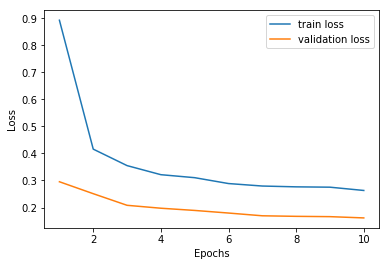

In [14]:
print("Keys for history object", history.history.keys())

train_loss = history.history['loss']
valid_loss = history.history['val_loss']
epochs = list(range(1, len(train_loss)+1))

plt.plot(epochs, train_loss, label="train loss")
plt.plot(epochs, valid_loss, label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

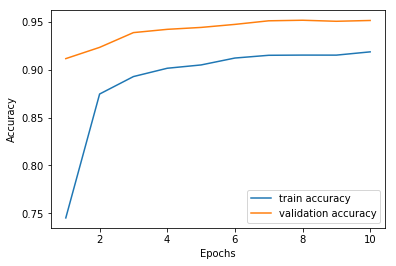

In [15]:
train_accuracy = history.history['acc']
valid_accuracy = history.history['val_acc']

epochs = list(range(1, len(train_accuracy)+1))

plt.plot(epochs, train_accuracy, label="train accuracy")
plt.plot(epochs, valid_accuracy, label="validation accuracy")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### Making predictions

In [16]:
predictions = model.predict(x_test)

print(predictions.shape)
print(np.argmax(predictions, axis=1)[0:10])
print(np.argmax(y_test, axis=1)[0:10])

(10000, 10)
[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


Arguments

- x: the input data, as a Numpy array.
- batch_size: Integer. If unspecified, it will default to 32.
- verbose: verbosity mode, 0 or 1.
- steps: Total number of steps (batches of samples) before declaring the prediction round finished. Ignored with the default value of None.

Returns

A Numpy array of predictions.

### Loading and saving a model

In [17]:
from keras.models import load_model

model_path = "my_new_model.h5"
model.save(model_path)
del model  # deletes the existing model
model = load_model(model_path)

# Mini-Project: Train you own fully connected neural network to classify handwritten digits

- Train a logistic regression to create a benchmark
- Train a neural network and compare. Start with a few layers, then experiment with more layers and different parameters.
- Are you overfitting? Underfitting? How can you improve your model? Try other hyperparameters or adding regularization. Make some plots to understand the behaviour of your model.
- Take a look at samples for which your model is predicting an incorrect label, what do you think is happening?

## Extra credit

- Try shuffling the order of the features before training (move the 5th pixel to a new random position) but do the same shuffling for all samples and retrain you model. How does it perform compared to the original model?

## Scaling matters

In [ ]:
# Scale the inputs
x_train /= 255  # The image is in grayscale and has values between 0 and 255
x_test /= 255

# Mini-Project: Train you own fully connected neural network to classify handwritten digits (Now with scaled data)

- Train a logistic regression to create a benchmark
- Train a neural network and compare. Start with a few layers, then experiment with more layers and different parameters.
- Are you overfitting? Underfitting? How can you improve your model? Try other hyperparameters or adding regularization. Make some plots to understand the behaviour of your model.

## Extra credit

- Try shuffling the order of the features before training (move the 5th pixel to a new random position) but do the same shuffling for all samples and retrain you model. How does it perform compared to the original model?

### Reload data before procedding

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# This makes sure the image has the correct order in the axis for Tensorflow, it would be different for Theano backend
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert values to floats, originally they are integers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Convert values of labels from 0 to 9 to categorical (one_hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Data augmentation and generators

Augmenting the data allows us to use more data for training by taking artificial modifications from the samples we already have. One example of this is rotating the image. This will allow our model to learn some rotational invariance to the data and prevent overfitting.

To train a model when a dataset is too large to load in RAM memory we can use generators. Generators allow us to only pass a small portion of the data at a time so it doesn't use all the memory from the computer. In addition once it loops through all the data we can set the generator so it starts again from the beginning. This allows us to loop infinitely through the data.

Keras gives us a nice tool for augmenting data which uses a generator. It uses a generator because the modifications are done on the fly and it would take too much memory to save the augmented dataset. Keras also provides us with a method to fit the model when we use a generator, fit_generator(). This method requires us to specify how many batches are equivalent to an epoch so the model knows when to do updates, otherwise since the generator loops through the data, it would go on training infinitely.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1./255,
                                    #featurewise_center=True,
                                    #featurewise_std_normalization=True,
                                    rotation_range=45,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    #horizontal_flip=True,
                                    zoom_range=0.1
                                    )

# we git the model to the data. This needed for calculating mean and std.
data_generator.fit(x_train)

### What does this look like?

In [ ]:
augmented_data_generator = data_generator.flow(x_train[0:40000], y_train[0:40000], batch_size=100)
augmented_batch, labels = augmented_data_generator.next()

print(augmented_batch.shape)
print(augmented_batch[0].shape)
print(labels[0])

# plot images as gray scale
for image_id in range(0, 5):
    plt.imshow(augmented_batch[image_id].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.title("The true label is %s" % str(np.argmax(labels[image_id])))
    plt.show()

### Training a model using a generator

In [ ]:
history = model.fit_generator(data_generator.flow(x_train[0:40000], y_train[0:40000], batch_size=100), 
                              steps_per_epoch=40000/100,
                              validation_data=(x_train[40000:], y_train[40000:]), 
                              epochs=10, verbose=2)

Arguments

- generator: A generator. The output of the generator must be either
a tuple (inputs, targets)
a tuple (inputs, targets, sample_weights). All arrays should contain the same number of samples. The generator is expected to loop over its data indefinitely. An epoch finishes when steps_per_epoch batches have been seen by the model.
- steps_per_epoch: Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch. It should typically be equal to the number of samples of your dataset divided by the batch size.
- epochs: Integer, total number of iterations on the data. 
- verbose: Verbosity mode, 0, 1, or 2.
- callbacks: List of callbacks to be called during training.
- validation_data: This can be either
A generator for the validation data
A tuple (inputs, targets)
A tuple (inputs, targets, sample_weights).
- validation_steps: Only relevant if validation_data is a generator. Number of steps to yield from validation generator at the end of every epoch. It should typically be equal to the number of samples of your validation dataset divided by the batch size. Optional for Sequence: if unspecified, will use the len(validation_data) as a number of steps.
- class_weight: Dictionary mapping class indices to a weight for the class.
- max_queue_size: Maximum size for the generator queue
- workers: Maximum number of processes to spin up
- use_multiprocessing: if True, use process based threading.
- initial_epoch: Epoch at which to start training (useful for resuming a previous training run).

Returns

A History object.

# Mini-Project: Train you own fully connected neural network to classify handwritten digits (Now with augmented data)

- Train a logistic regression to create a benchmark
- Train a neural network and compare. Start with a few layers, then experiment with more layers and different parameters.
- Are you overfitting? Underfitting? How can you improve your model? Try other hyperparameters or adding regularization. Make some plots to understand the behaviour of your model.

# Convolutional Neural Networks

Convolutional neural networks are similar to the previous networks we saw with a main difference, they start with the assumption that the input will be an image and optimize the architecture for that assumption. Now they are used in many other contexts besides images, but this is what they were created for.

Convolutional layer define a kernel (weight matrix) which is then multiplied element by element with a section of the input of the same size. Sum all the resulting values. Move the kernel a number of pixels equal to a defined stride size and repeat until you go throught the whole image. Afterwards apply an activation function to each one of the values. Now repeat all of this for each filter in your layer.

<img src="images/conv_layer.gif" alt="convolutional layer">
Animation from Karpathy (http://cs231n.github.io/convolutional-networks/)

A key aspect is the fact that the weights from the kernel are the same when applied in all sections of the input for the same filter. This means the convolutional layer has way less free parameters than a fully connected layer. This also gives the model location invariance since the filters will activate in the same way if the object is in the top left of the image or at the bottom right.

Images are 3D objects which have height, length and depth. In the case of grayscale images the depth is 1, however in color images you have 3 channels, red, green and blue. So convolutional layers take as input a 3D tensor and outputs a 3D tensor.

<img src="images/cnn.jpeg" alt="convolutional layer">
Image from Karpathy (http://cs231n.github.io/convolutional-networks/)

Notice the convolutional operation will reduce the size of the input. Depending on your architecture you might want to keep the size constant, you can do this by includding padding in the borders of the input. 

## Pooling layers

The idea of the pooling layer is to reduce the size of the input and also help regularize the model. The most famous type of pooling is max pooling. In this case you select an area which is the size of the filter and from it you will only pass through the maximum values among the inputs. Then move the filter a specific stride size and repeat.

<img src="images/maxpool.jpeg" alt="convolutional layer">
Image from Karpathy (http://cs231n.github.io/convolutional-networks/)

## Best Practices

In practice it is best to use blocks of stacked convolutional layers with rectified linear units followed by a max pooling operation. Then at the end have a small number of fully connected layers and the output layer.

Each convolutional layer usually has a small filter size (2, 2), (3, 3) and use max pooling with stride (2, 2)

# Convolutional Neural Networks in Keras

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

### Convolutional layer

In [ ]:
Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', 
                    activation=None, use_bias=True, 
                    kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                    kernel_constraint=None, bias_constraint=None)

In [ ]:
Conv2D(32, (3, 3), padding='same')  # Keeps output of the same size as input
Conv2D(32, (3, 3)) # Reduces the size of the output

Arguments

- filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
- kernel_size: An integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
- strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the width and height. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
- padding: one of "valid" or "same" (case-insensitive).
- activation: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
- use_bias: Boolean, whether the layer uses a bias vector.
- kernel_initializer: Initializer for the kernel weights matrix (see initializers).
- bias_initializer: Initializer for the bias vector (see initializers).
- kernel_regularizer: Regularizer function applied to the kernel weights matrix (see regularizer).
- bias_regularizer: Regularizer function applied to the bias vector (see regularizer).
- activity_regularizer: Regularizer function applied to the output of the layer (its "activation"). (see regularizer).
- kernel_constraint: Constraint function applied to the kernel matrix (see constraints).
- bias_constraint: Constraint function applied to the bias vector (see constraints).

Input shape

4D tensor with shape: (samples, channels, rows, cols) if data_format='channels_first' or 4D tensor with shape: (samples, rows, cols, channels) if data_format='channels_last'.

Output shape

4D tensor with shape: (samples, filters, new_rows, new_cols) if data_format='channels_first' or 4D tensor with shape: (samples, new_rows, new_cols, filters) if data_format='channels_last'. rows and cols values might have changed due to padding.

### Pooling layer

In [ ]:
MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')  # This will reduce the size of the output

Arguments

- pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension. If only one integer is specified, the same window length will be used for both dimensions.
- strides: Integer, tuple of 2 integers, or None. Strides values. If None, it will default to pool_size.
- padding: One of "valid" or "same" (case-insensitive).

Input shape

4D tensor with shape: (batch_size, rows, cols, channels)

Output shape

4D tensor with shape: (batch_size, pooled_rows, pooled_cols, channels)

# Mini-Project: Train you own convolutional neural network to classify handwritten digits (With or without augmented data)

- Train a logistic regression to create a benchmark
- Train a convolutional neural network and compare it with the logistic regression and fully connected neural network. Start with a few layers, then experiment with more layers and different parameters.
- Are you overfitting? Underfitting? How can you improve your model? Try other hyperparameters or adding regularization. Make some plots to understand the behaviour of your model.